In [1]:
import pandas as pd 
import numpy as py 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()


In [3]:
data= pd.read_csv('personality_dataset.csv')

In [13]:
data.isna().sum()

Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64

In [93]:
# cahnge all the string values into binary values in order to be proccess through the ML models 
data1= data.copy()
data1['Personality']=data1['Personality'].map({'Extrovert':0,'Introvert':1})
data1['Stage_fear']=data1['Stage_fear'].map({'No':0,'Yes':1})
data1['Drained_after_socializing']= data1['Drained_after_socializing'].map({'No':0,'Yes':1})

In [95]:
data1.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0.0,4.0,6.0,0.0,13.0,5.0,0
1,9.0,1.0,0.0,0.0,1.0,0.0,3.0,1
2,9.0,1.0,1.0,2.0,1.0,5.0,2.0,1
3,0.0,0.0,6.0,7.0,0.0,14.0,8.0,0
4,3.0,0.0,9.0,4.0,0.0,8.0,5.0,0


In [97]:
data1.describe()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
count,2837.000000,2827.000000,2838.000000,2834.000000,2848.000000,2823.000000,2835.000000,2900.000000
mean,4.505816,0.498762,3.963354,3.000000,0.494031,6.268863,3.564727,0.485862
std,3.479192,0.500087,2.903827,2.247327,0.500052,4.289693,2.926582,0.499886
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,2.000000,1.000000,0.000000,3.000000,1.000000,0.000000
50%,4.000000,0.000000,3.000000,3.000000,0.000000,5.000000,3.000000,0.000000
75%,8.000000,1.000000,6.000000,5.000000,1.000000,10.000000,6.000000,1.000000
max,11.000000,1.000000,10.000000,7.000000,1.000000,15.000000,10.000000,1.000000


In [99]:
data1.isna().sum(axis=1).value_counts().sort_index()

0    2477
1     391
2      29
3       3
Name: count, dtype: int64

In [101]:
for item in ['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance', 'Going_outside', 'Drained_after_socializing', 'Friends_circle_size', 'Post_frequency']:
    data1[item] = data1[item].interpolate(method = 'linear')
data1.isnull().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

In [103]:
data1.describe()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
count,2900.000000,2900.000000,2900.000000,2900.000000,2900.000000,2900.000000,2900.000000,2900.000000
mean,4.498448,0.498448,3.975172,2.995690,0.494483,6.275862,3.566724,0.485862
std,3.461399,0.497924,2.889670,2.238618,0.498674,4.264389,2.906708,0.499886
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,2.000000,1.000000,0.000000,3.000000,1.000000,0.000000
50%,4.000000,0.500000,3.500000,3.000000,0.000000,5.000000,3.000000,0.000000
75%,8.000000,1.000000,6.000000,5.000000,1.000000,10.000000,6.000000,1.000000
max,11.000000,1.000000,10.000000,7.000000,1.000000,15.000000,10.000000,1.000000


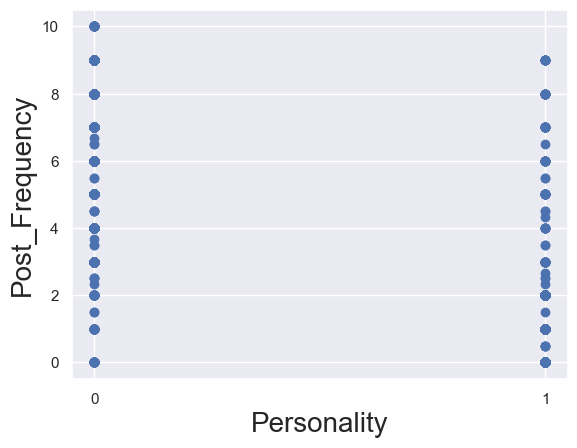

In [105]:
# simple Linear Regression 
x= data1['Personality']
y= data1['Post_frequency']

plt.scatter(x,y)
plt.xlabel("Personality", fontsize=20)
plt.ylabel("Post_Frequency",fontsize=20)
plt.xticks(py.arange(min(x), max(x)+1, 1)) 
plt.show()

 There is a cluster or 2-4 posting frequency for intoverts and 2-4 and 6-8 for extroverts
 The graph doesn't show a linear slope meaning being a extrovert or introvert doesn't affects a person's
 social media posting frequency 
there could be other factors included in 


In [154]:
x= data1.iloc[:,0:7]
y= data1['Personality']
reg_log=sm.Logit(y,x).fit()
reg_log.summary()


Optimization terminated successfully.
         Current function value: 0.257141
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Personality   No. Observations:                 2900
Model:                          Logit   Df Residuals:                     2893
Method:                           MLE   Df Model:                            6
Date:                Fri, 06 Jun 2025   Pseudo R-squ.:                  0.6288
Time:                        13:44:18   Log-Likelihood:                -745.71
converged:                       True   LL-Null:                       -2009.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Time_spent_Alone             -0.1538      0.037     -4.194      0.000      -0.226      -0.082
Stage_fear                    1.9192      0.372      5.165      0.000       1.191       2.647
Social_event_attendance      -0.1059      0.041     -2.585      0.010      -0.186      -0.026
Going_outside                -0.1568      0.054     -2.902      0.004      -0.263      -0.051
Drained_after_socializing     2.3145      0.375      6.172      0.000       1.580       3.049
Friends_circle_size          -0.0155      0.026     -0.608      0.543      -0.066       0.035
Post_frequency               -0.1524      0.043     -3.509      0.000      -0.237      -0.067
=============================================================================================
"""

It can be seen Friends_circle_size does not have a signifcant affect on a person's personality.
We can delete Friends_circle_size. 

In [156]:
x= data1.iloc[:,0:7]
x= x.drop('Friends_circle_size',axis=1)
y= data1['Personality']
reg_log=sm.Logit(y,x).fit()
reg_log.summary()

Optimization terminated successfully.
         Current function value: 0.257205
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Personality   No. Observations:                 2900
Model:                          Logit   Df Residuals:                     2894
Method:                           MLE   Df Model:                            5
Date:                Fri, 06 Jun 2025   Pseudo R-squ.:                  0.6287
Time:                        13:59:42   Log-Likelihood:                -745.89
converged:                       True   LL-Null:                       -2009.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Time_spent_Alone             -0.1550      0.037     -4.234      0.000      -0.227      -0.083
Stage_fear                    1.9187      0.372      5.154      0.000       1.189       2.648
Social_event_attendance      -0.1153      0.038     -3.040      0.002      -0.190      -0.041
Going_outside                -0.1673      0.051     -3.268      0.001      -0.268      -0.067
Drained_after_socializing     2.3172      0.376      6.166      0.000       1.581       3.054
Post_frequency               -0.1589      0.042     -3.779      0.000      -0.241      -0.077
=============================================================================================
"""

pseudo R shows almost no change in value after deleting Friends_circle_size this shows the
variable was insignificant 

Testin 

In [164]:
x= data1.drop(['Personality'],axis =1) # all the values are being put into x besides  personality 
y= data1['Personality'] # the targer/ predicted value is personality
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2, random_state=365)

In [170]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression ()
model.fit(train_x,train_y)

LogisticRegression()

In [195]:
y_model=model.predict(test_x)
prediction = list(map(round, y_model))


Going to create a confusion matrix and see the accuracy score of the model 

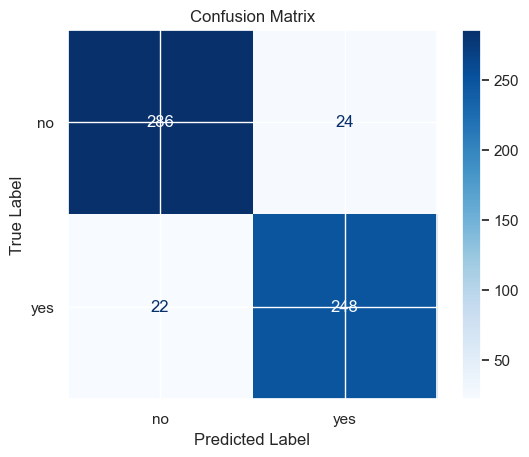

accuracy 0.9206896551724137


In [189]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay
cm = confusion_matrix(test_y,prediction)
Labels=['no','yes']
display= ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=Labels)
display.plot(cmap='Blues')  # you can use other colormaps like 'Greens', 'Reds'
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print("accuracy", accuracy_score(test_y, prediction))

This model shows a 92% accuracy. The model was well trained and many of the inputs 
where correcty answered to be either extrovert or introvert. 

The question is if the person is a introvert: yes or no. If its answer no then its predicted the person is 
a Extrovert. 286 were predicted correctly to be a extrovert and 248 to be correctly predicted as a introvert. 